# 비지도 학습 : 차원축소, 군집화

### [1] 차원 축소
### - PCA(Principal Component Analysis) : 주성분 분석
- 차원 축소 알고리즘, 비지도 학습
- 이미지 데이터의 차원 축소, 자연언어 텍스트 의미 분석

- 과적합을 방지할수 있다

In [1]:
# PCA 예제

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# iris 데이터를 가져오기
iris = load_iris()
type(iris)  # sklearn.utils.Bunch ==> numpy array의 묶음
type(iris.data)    # X     numpy array
type(iris.target)  # Y     numpy array 
# numpy array를 DataFrame으로 변환
# sepal : 꽃받침    
# petal : 꽃잎
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df  # 원본 컬럼 이름을 출력

# 컬럼 이름을 새로 만들어서 데이터 프레임을 생성
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data,columns=columns)

# target 은 'setosa' : 0,  'versicolor' : 1   ,'virginica':2
# 답이 3개 이상인 multi-classification 
iris_df['target'] = iris.target
iris_df  # (150, 5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


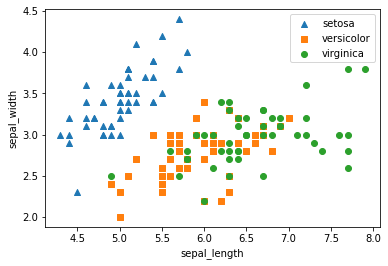

In [2]:
# 원본 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal_length']
    y = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [3]:
# 데이터를 표준화하여 정규분포로 전처리
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df)
# iris_scaled

# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 축소될 차원 설정: 2차원
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)  #  (150,2)

# PCA 변환 데이터를 target을 추가하여 데이터 프레임으로 변경
pca_columns = ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca

(150, 2)


,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


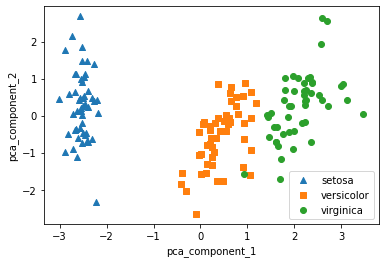

In [4]:
# PCA 데이터의 시각화
# 'setosa' : 세모,  'versicolor' : 네모   ,'virginica': 동그라미
markers = ['^', 's', 'o']

for i , marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [5]:
# 변동성 비율 : 76.7% + 18.2% ==> 95%
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [6]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156,n_estimators=100)

# 원본 데이터로 교차 검증
scores = cross_val_score(rcf,iris.data,iris.target,
                         scoring='accuracy', cv=3)
print(scores)
# [0.98039216 0.92156863 0.95833333]

[0.98 0.94 0.96]


In [7]:
# PCA 데이터로 교차 검증
# pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
pca_x = iris_df_pca.iloc[:,:-1]
scores_pca = cross_val_score(rcf,pca_x,iris.target,
                         scoring='accuracy', cv=3)
print('pca score:',scores_pca)
# pca score: [0.98039216 0.98039216 1.        ]
# 결론 PCA 변환하여 예측한 결과의 정확도가 약간 상승했다

pca score: [0.98 0.98 1.  ]


### 차원이 매우 많은 경우의 PCA 변환 예제

In [8]:
# 신용카드 고객데이터  가져오기
import pandas as pd

df = pd.read_excel('credit_card.xls',sheet_name='Data')
df.shape     # (30000, 24)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [9]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},
                  inplace=True)
X_features = df.drop('default',axis = 1)
X_features.shape   # (30000, 23)
Y_target = df['default']
Y_target.shape     # (30000, 23)

X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

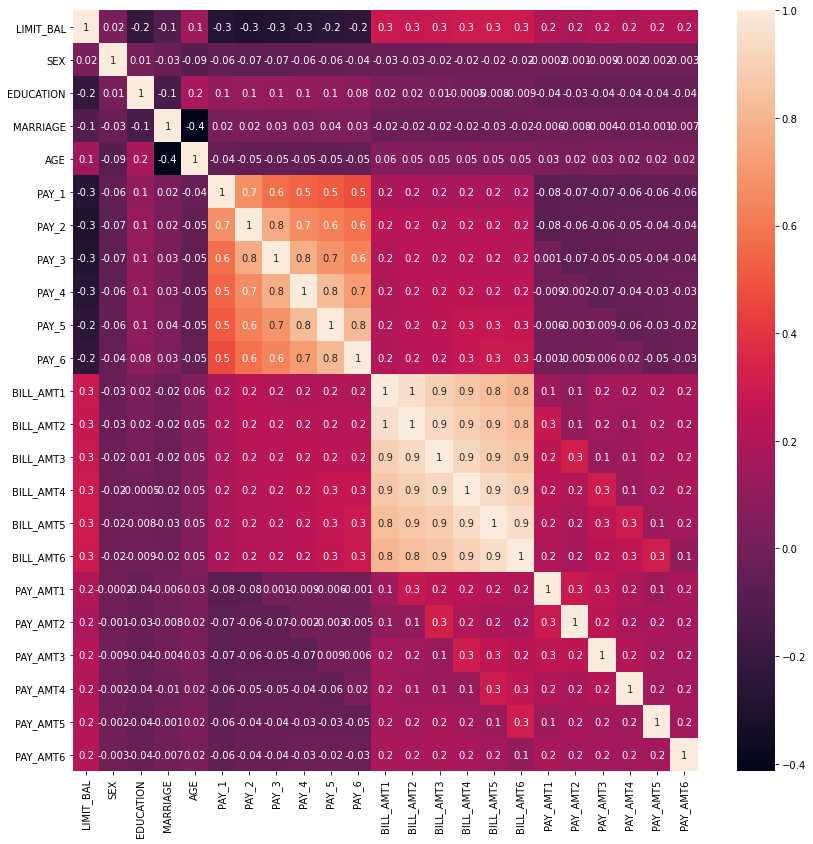

In [10]:
# seaborn 사용 변수간의 상관관계를 heatmap 출력
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')

In [11]:
# PCA 변환 : BILL_AMT1 ~ BILL_AMT6 6개를 2개로 축소
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('상관관계가 높은 속성명:',cols_bill)
# df.columns.values[11:17]

# 6개 컬럼의 데이터를 표준화
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# PCA 변환   : 6개를 2개로 축소
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:',pca.explained_variance_ratio_)
#  [0.90555253 0.0509867 ]  # 95.5% 

상관관계가 높은 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [12]:
# 원본 데이터 사용 예측의 정확도 측정 
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf,X_features,Y_target,scoring='accuracy',cv=3)
print("cv=3 원본데이터 예측 정확도:",scores)
print('평균정확도:',np.mean(scores))  # 81.7%

cv=3 원본데이터 예측 정확도: [0.8083 0.8196 0.8232]
평균정확도: 0.8170333333333333


In [13]:
# PCA 변환한 데이터를 사용한 예측의 정확도 측정 : 전체를 6개로 축소
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf,df_scaled,Y_target,
                             scoring='accuracy',cv=3)
print("cv=3 PCA 변환 데이터 예측 정확도:",scores_pca)
print(' PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))  # # 81.6%

cv=3 PCA 변환 데이터 예측 정확도: [0.8083 0.8194 0.8229]
 PCA 변환 데이터 평균 정확도: 0.8168666666666665


##### 과적합(Overfitting) : 학습 데이터에서는 예측 정확도 높이나오는데
##### 학습에 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 정확도가 떨어지는 경우

### [2]  군집화(Clustering,클러스터링)
#### 비지도 학습

#####  K-means(K-평균) , Mean Shift(평균이동), 친근도전파


### K-means(K-평균) 
- N개의 표본을 K개의 군집으로 나눈다
- 군집화중 가장 많이 사용, 쉽고 간결하다
- 속성(변수)의 갯수가 너무 많으면 정확도가 떨어져서 PCA로 차원 감소가 필요
- 몇개의 군집을 선택해야할지 어렵다

In [14]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
columns = ['sepal_length',
           'sepal_width',
           'petal_length',
           'petal_width']
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF.shape # (150, 4)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [15]:
# sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10,
# max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, 
# random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0).fit(irisDF)
print(kmeans)
type(kmeans)  #sklearn.cluster.k_means_.KMeans

KMeans(n_clusters=3, random_state=0)


sklearn.cluster._kmeans.KMeans

In [16]:
print(kmeans.labels_)      # 각 데이터트가 속한 군집 중심점의 레이블
print(kmeans.cluster_centers_) # 중심점 실제 좌표값

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [17]:
pd.set_option('display.max_rows',500)
irisDF.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [18]:
irisDF['cluster'] = kmeans.labels_  # 원본 소스에 누락된 라인!!
irisDF['target'] = iris.target
irisDF
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
# target이 0인 데이터는 1번 군집에 50개
# target이 1인 데이터는 0번 군집에 48개,2번 군집에 2개
# target이 2인 데이터는 0번 군집에 4개, 2번 군집에 36개로 생성

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [19]:
# KMeans기초예제 : scikit-learn 도움말의 Example
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])  # (6,2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])

array([[10.,  2.],
       [ 1.,  2.]])

In [20]:
# iris 군집화 결과를 시각화하기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
# irisDF

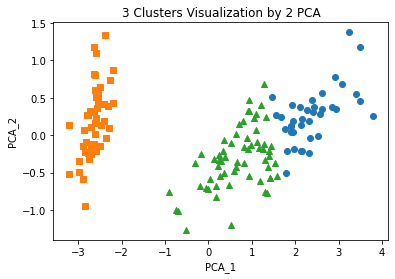

In [21]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index  # 0번 군집의 행번호
marker1_ind = irisDF[irisDF['cluster'] == 1].index  # 1번 군집의 행번호
marker2_ind = irisDF[irisDF['cluster'] == 2].index  # 2번 군집의 행번호

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'] , 
            y=irisDF.loc[marker0_ind,'pca_y'], marker='o')

plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'] , 
            y=irisDF.loc[marker1_ind,'pca_y'], marker='s')

plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'] , 
            y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA')
plt.show()
# Cluster 1(네모)는 다른 군집과 명확히 군집화 되었음
# Cluster 0(동그라미) 과 Cluster 2(세모)는 덜 분리되어짐

### 군집 평가(Clustaer Evaluation)

In [22]:
# 실루엣(silhouette) 분석
# 실루엣 계수 : 군집화의 지표, 높을수로 좋음

from sklearn.metrics import silhouette_samples,silhouette_score


kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,
                random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(iris.data,irisDF['cluster'])
# print(score_samples)   # (150,)

irisDF['silhouette_coeff'] = score_samples
irisDF

# silhouette_score( ): 평균 실루엣 계수를 구함
average_score = silhouette_score(iris.data,irisDF['cluster'])
print('iris K-means 평균 실루엣 계수:',average_score) # 0.55

iris K-means 평균 실루엣 계수: 0.5528190123564091


In [23]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

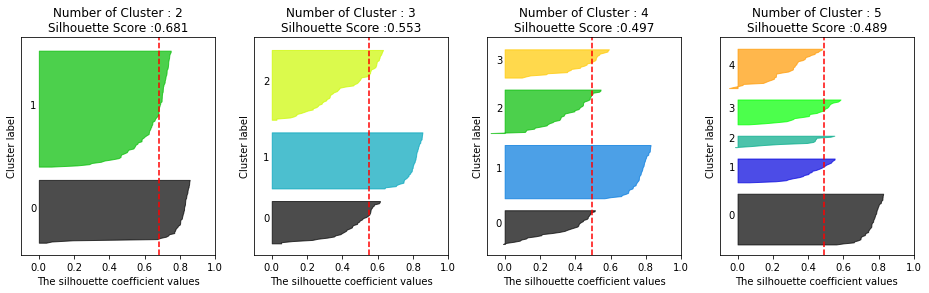

In [24]:
visualize_silhouette([2,3,4,5],iris.data)

In [25]:
from sklearn.base import TransformerMixin

class A(TransformerMixin):
    def fit(self,X):
        print('fit:',X)
        return self
    
    def transform(self,X):
        print('trans:',X)  
        return X
    
inst = A()
inst.fit('x_data')
inst.transform('y_data')
inst.fit_transform('my_data')

# <출력>

# fit: x_data
# trans: y_data
# fit: my_data
# trans: my_data

fit: x_data
trans: y_data
fit: my_data
trans: my_data


'my_data'

### [3] 평균이동(Mean Shift)
- 대역폭(bandwith)를 사용하여밀도가 높는곳으로 이동하여 중심을 찾는다
- cluster(군집)의 갯수를 지정하지 않아도 자동으로 설정된다
- 이미지나 영상데이터 처리에 자주 사용된다

In [26]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# make_blobs(): 임의의 데이터셋을 생성
x, y = make_blobs(n_samples=200,n_features=2, centers=3,
                 cluster_std=0.6, random_state=0)  # 원본소스수정 0.8-->0.6
print('x:',x.shape)  # (200,2)
print('y:',y.shape)  # (200,)

# bandwidth=0.62일때  --> 8개 cluster
meanshift = MeanShift(bandwidth=0.62)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))  

# bandwidth=1.114 일때  --. 3개 cluster
meanshift = MeanShift(bandwidth=1.114)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))


x: (200, 2)
y: (200,)
cluster labels: [0 1 2 3 4 5 6 7]
cluster labels: [0 1 2]


In [27]:
# bandwidth 의 최적값을 구하기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(x, quantile=0.2)
print('bandwidth:',round(bandwidth,3) ) # 1.114

bandwidth: 1.114


In [28]:
# 평균이동(Mean Shift) 및 시각화

import pandas as pd

clusterDF = pd.DataFrame(data=x,columns=['ftr1','ftr2'])
clusterDF['target'] = y     # [0,1,2]
clusterDF

# estimate_bandwidth() 사용하여 최적의 bandwidth계산
best_bandwidth = estimate_bandwidth(x,quantile=0.2)
print(best_bandwidth)

meanshift = MeanShift(bandwidth=best_bandwidth) # 원본소스 오타
cluster_labels = meanshift.fit_predict(x)
print('cluster labels:',np.unique(cluster_labels))

1.113759224777449
cluster labels: [0 1 2]


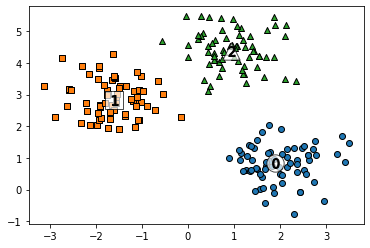

target  meanshift_label
0       2                  67
1       0                  67
2       1                  66
Name: meanshift_label, dtype: int64


In [29]:
# matplotlib로 시각화
clusterDF['meanshift_label'] = cluster_labels
# clusterDF
centers = meanshift.cluster_centers_
# centers
unique_labels = np.unique(cluster_labels)   # [0 1 2]
markers = ['o','s','^','x','*']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],
               edgecolor='k',marker=markers[label])
    # 중심점(center)을 표시
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=300,color='white',
               edgecolor='k',alpha = 0.7, marker=markers[label])

    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=100,color='k',
               edgecolor='k', marker='$%d$'%label)
              
    
plt.show()
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

In [30]:
# 실루엣(silhouette) 분석
# 실루엣 계수 : 군집화의 지표, 높을수로 좋음

from sklearn.metrics import silhouette_samples,silhouette_score

# silhouette_samples() : 모든 개별데이터의 실루엣 계수를 구함
score_samples = silhouette_samples(x,clusterDF['meanshift_label'])
# print(score_samples)   

clusterDF['silhouette_coeff'] = score_samples
clusterDF

# silhouette_score( ): 평균 실루엣 계수를 구함
average_score = silhouette_score(x,clusterDF['meanshift_label'])
print('Mean Shift 평균 실루엣 계수:',average_score) # 0.677

Mean Shift 평균 실루엣 계수: 0.6771591392061186


C:\ProgramData\Anaconda3\envs\tf230\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


cluster_centers: [[ 0.91778365 -0.93102129]
 [ 0.96967879  0.93061892]
 [-0.92387658 -0.96841358]]
number of estimated clusters : 3


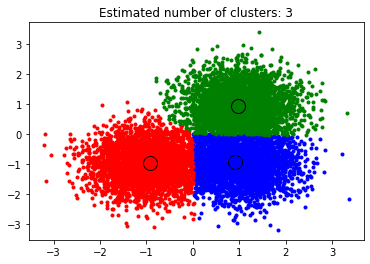

In [31]:
# A demo of the mean-shift clustering algorithm
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]